ST 2195 Q2

# Do older planes suffer more delays?

## Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [2]:
df2006 = pd.read_csv('2006.csv')

In [3]:
df2007 = pd.read_csv('2007.csv')

In [4]:
df2004 = pd.read_csv('2004.csv')

In [5]:
df2005 = pd.read_csv('2005.csv')

In [6]:
dfplanedata = pd.read_csv('plane-data.csv')

## Data Wrangling

Firstly, we will reduce the data by the columns we will be needing. We wiil need three columns (Year, Tailnum, Arrdelay).

In [7]:
df2006_subtable = df2006[['Year','TailNum','ArrDelay']]

In [8]:
df2007_subtable = df2007[['Year','TailNum','ArrDelay']]

In [9]:
df2004_subtable = df2004[['Year','TailNum','ArrDelay']]

In [10]:
df2005_subtable = df2005[['Year','TailNum','ArrDelay']]

Next we will drop Na values from the previous reduced columns data.

In [11]:
df2006_NoNa = df2006_subtable.dropna()

In [12]:
df2007_NoNa = df2007_subtable.dropna()

In [13]:
df2004_NoNa = df2004_subtable.dropna()

In [14]:
df2005_NoNa = df2005_subtable.dropna()

We will also reduce the columns for planedata. There are many columns in planedata but we will only be requiring two columns (tailnum, year).

In [15]:
dfq2planedata = dfplanedata[['tailnum','year']]

We need to rename the column name in plane data from tailnum to TailNum. When we merge the data later if we keep the original name the data will not be merge by a similar column. Since we need the data to merge by a common column, we will rename to keep the same as data given by year. After, renaming wwe will merge the year data and planedata. the code used will already recognise that there is a common column and merge accordingly. the rows in the year data under TailNum column that has same value will merge with the same values the rows in planedata. 

In [16]:
dfplanedata1 = dfq2planedata.rename(columns={'tailnum':'TailNum'})

In [17]:
dftable2006 = pd.merge(df2006_NoNa,dfplanedata1)

In [18]:
dftable2007 = pd.merge(df2007_NoNa,dfplanedata1)

In [19]:
dftable2004 = pd.merge(df2004_NoNa,dfplanedata1)

In [20]:
dftable2005 = pd.merge(df2005_NoNa,dfplanedata1)

We will drop the Na values as the columns in planedat we have not dropped the Na values we need to drop Na values. In the column 'year' there is value os 'None' and it is not removed when we dropna thus we need to use the next code to remove those. we need to change the data type of the column 'year' from a string to integer as the column 'Year' is an integer. we need to subtract the two columns which both has to be integer.

In [21]:
dftable2006nona = dftable2006.dropna()

In [22]:
dfq2table2006 = dftable2006nona.mask(dftable2006nona.eq('None')).dropna()

In [23]:
dfq2table2006['year'] = pd.to_numeric(dfq2table2006['year'])

In [24]:
dftable2007nona = dftable2007.dropna()

In [25]:
dfq2table2007 = dftable2007nona.mask(dftable2007nona.eq('None')).dropna()

In [26]:
dfq2table2007['year'] = pd.to_numeric(dfq2table2007['year'])

In [27]:
dftable2004nona = dftable2004.dropna()

In [28]:
dfq2table2004 = dftable2004nona.mask(dftable2004nona.eq('None')).dropna()

In [29]:
dfq2table2004['year'] = pd.to_numeric(dfq2table2004['year'])

In [30]:
dftable2005nona = dftable2005.dropna()

In [31]:
dfq2table2005 = dftable2005nona.mask(dftable2005nona.eq('None')).dropna()

In [32]:
dfq2table2005['year'] = pd.to_numeric(dfq2table2005['year'])

## Age of Plane 

Now we subtract the column 'year' from 'Year' and create a new column as Age. This will be the age of plane. we will need to also drop rows with values in the column 'Age' that does not make sense. For example, a age cannot be negative and the age also cannot be the same as the year the data is from. The age 2004, 2005, 2006, 2007 only appears as the the column 'year' might have the year as 0. Afterwhich, we will average the ArrDelay by the Age.This will be presented as pivot table to be plotted in the next part.

### 2006 

In [33]:
dfq2table2006['Age'] = dfq2table2006['Year'] - dfq2table2006['year']

In [34]:
dfq2table2006

,Year,TailNum,ArrDelay,year,Age
0,2006,N657AW,6.0,1999,7
1,2006,N657AW,-5.0,1999,7
2,2006,N657AW,-10.0,1999,7
3,2006,N657AW,-2.0,1999,7
4,2006,N657AW,-2.0,1999,7
...,...,...,...,...,...
5812331,2006,N649JB,-18.0,2006,0
5812332,2006,N649JB,-12.0,2006,0
5812333,2006,N649JB,-26.0,2006,0
5812334,2006,N649JB,-12.0,2006,0


In [35]:
values = [-1,2006]
dfq2_2006 = dfq2table2006[dfq2table2006.Age.isin(values) == False]

In [36]:
df2006_avgage = dfq2_2006.pivot_table(values = 'ArrDelay', index = ['Age'])

In [37]:
df2006_avgage

,ArrDelay
Age,
0,10.713895
1,9.902789
2,10.029553
3,9.365692
4,9.564946
5,7.961501
6,8.997378
7,9.341126
8,9.276391


### 2007 

In [38]:
dfq2table2007['Age'] = dfq2table2007['Year'] - dfq2table2007['year']

In [39]:
dfq2table2007

,Year,TailNum,ArrDelay,year,Age
0,2007,N611SW,3.0,1995,12
1,2007,N611SW,21.0,1995,12
2,2007,N611SW,-4.0,1995,12
3,2007,N611SW,18.0,1995,12
4,2007,N611SW,18.0,1995,12
...,...,...,...,...,...
6808765,2007,N665JB,40.0,2007,0
6808766,2007,N665JB,10.0,2007,0
6808767,2007,N665JB,-3.0,2007,0
6808768,2007,N665JB,-1.0,2007,0


In [40]:
dfq2_2007 = dfq2table2007[dfq2table2007.Age !=2007]

In [41]:
df2007_avgage = dfq2_2007.pivot_table(values = 'ArrDelay', index = ['Age'])

In [42]:
df2007_avgage

,ArrDelay
Age,
0,7.898280
1,8.427712
2,9.151290
3,9.369143
4,11.195931
5,10.828121
6,8.580182
7,9.358422
8,10.211389


### 2004 

In [43]:
dfq2table2004['Age'] = dfq2table2004['Year'] - dfq2table2004['year']

In [44]:
Value = [-3,2004]
dfq2_2004 = dfq2table2004[dfq2table2004.Age.isin(Value) == False]

In [45]:
df2004_avgage = dfq2_2004.pivot_table(values = 'ArrDelay', index = ['Age'])

In [46]:
df2004_avgage

,ArrDelay
Age,
0,6.854261
1,5.176370
2,6.146535
3,5.370109
4,6.079132
5,6.075012
6,5.949853
7,6.728570
8,5.775148


### 2005 

In [47]:
dfq2table2005['Age'] = dfq2table2005['Year'] - dfq2table2005['year']

In [48]:
Value2005 = [-2,2005]
dfq2_2005 = dfq2table2005[dfq2table2005.Age.isin(Value2005) == False]

In [49]:
df2005_avgage = dfq2_2005.pivot_table(values = 'ArrDelay', index = ['Age'])

In [50]:
df2005_avgage

,ArrDelay
Age,
0,7.646861
1,7.446853
2,6.108492
3,7.838889
4,7.024224
5,7.846201
6,7.558214
7,7.167340
8,8.149584


## Ploting Graph

Now, we will plot the bar graph.

Text(0, 0.5, 'Avg Arr Delay ')

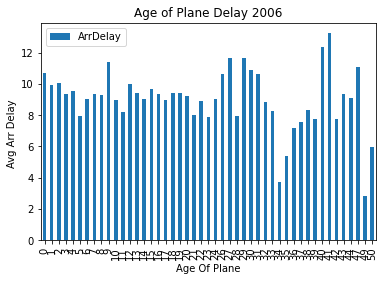

In [51]:
df2006_avgage.plot(kind="bar")
plot.title("Age of Plane Delay 2006")
plot.xlabel("Age Of Plane")
plot.ylabel("Avg Arr Delay ")

Text(0, 0.5, 'Avg Arr Delay ')

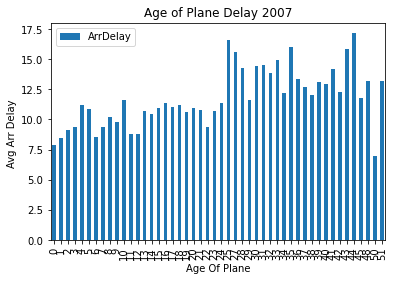

In [52]:
df2007_avgage.plot(kind="bar")
plot.title("Age of Plane Delay 2007")
plot.xlabel("Age Of Plane")
plot.ylabel("Avg Arr Delay ")

Text(0, 0.5, 'Avg Arr Delay ')

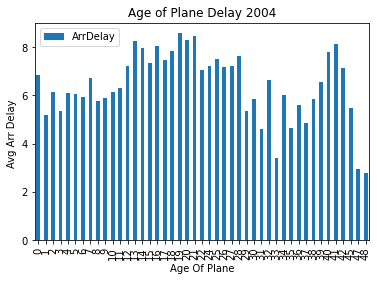

In [53]:
df2004_avgage.plot(kind="bar")
plot.title("Age of Plane Delay 2004")
plot.xlabel("Age Of Plane")
plot.ylabel("Avg Arr Delay ")

Text(0, 0.5, 'Avg Arr Delay ')

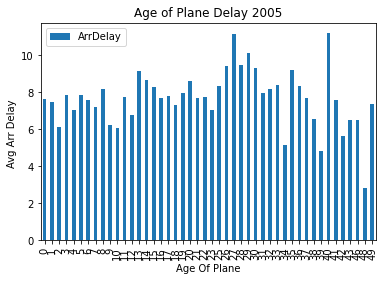

In [54]:
df2005_avgage.plot(kind="bar")
plot.title("Age of Plane Delay 2005")
plot.xlabel("Age Of Plane")
plot.ylabel("Avg Arr Delay ")